Для выполнения домашнего задания необходимо взять файл boston house-prices datase (sklearn.datasets.load_boston) и построить модель.
По аналогии задания к лекции «Классификация: Логистическая регрессия и SVM».
А именно построить модель регрессии, дерево решений, оптимизировать параметры и сравнить результаты.

In [1]:
from sklearn import tree
from sklearn.datasets import load_boston
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

import graphviz
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv(load_boston()['filename'], skiprows=1)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


У меня остался от прошлого задания готовый набор новых признаков для load_boston. Проводить обучение буду на этом наборе, по возможности постараюсь его сократить.

In [3]:
def best_dataset(data=pd.read_csv(load_boston()['filename'], skiprows=1)):
    columns = list(load_boston()['feature_names'])
    the_data = data[ (data['CRIM'] < 17) ]
    
    for col in ['RM', 'LSTAT', 'ZN', 'INDUS', 'PTRATIO', 'NOX', 'RAD', 'AGE', 'TAX']:
        the_data[col + '2'] = the_data[col] ** 2
        columns.append(col + '2')
    
    for col in ['RAD', 'INDUS', 'PTRATIO', 'NOX']:
        the_data [col + '3'] = the_data[col] ** 3
        columns.append(col + '3')
        
    for i in range(4, 7):
        the_data['PTRATIO' + str(i)] = the_data.PTRATIO ** i
        columns.append('PTRATIO' + str(i))
    
    the_data['NOX_INDUS'] = the_data['INDUS'] / (the_data['NOX'] ** 7)
    the_data['B_LSTAT'] = 1 / the_data['B'] / the_data['LSTAT']
    the_data['CRIM_RM'] = 1 / the_data['CRIM'] / the_data['RM']
    the_data['CRIM_AGE'] = the_data['AGE'] / the_data['CRIM']
    the_data['CRIM_PTRATIO'] = (the_data['PTRATIO'] ** 8) * the_data['CRIM']
    the_data['CHAS_INDUS'] = the_data['CHAS'] * (the_data['INDUS3'] ** 3)
    the_data['CHAS_NOX'] = the_data['CHAS'] * (the_data['NOX2'] ** 22)
    the_data['CHAS_AGE'] = the_data['CHAS'] * (the_data['AGE'] ** 5)
    the_data['CHAS_LSTAT'] = the_data['CHAS'] * the_data['LSTAT']
    the_data['LSTAT_AGE'] = the_data['LSTAT'] * (the_data['AGE'] ** 2)
    the_data['LSTAT_INDUS'] = the_data['LSTAT'] * (the_data['INDUS'] ** 3)
    the_data['LSTAT_NOX'] = 1 / the_data['LSTAT'] / the_data['NOX']
    the_data['LSTAT_RM'] = 1 / the_data['LSTAT'] / the_data['RM']
    the_data['LSTAT_DIS'] = (the_data['DIS'] ** 2) / the_data['LSTAT']
    the_data['LSTAT_RAD'] = the_data['RAD'] / the_data['LSTAT']
    the_data['LSTAT_PTRATIO'] = the_data['PTRATIO6'] * the_data['LSTAT']
    the_data['RM_ZN'] = the_data['ZN'] / the_data['RM']
    the_data['RM_INDUS'] = (the_data['INDUS'] ** 2) / the_data['RM']
    the_data['INDUS_TAX'] = the_data['INDUS'] / the_data['TAX']
    the_data['INDUS_PTRATIO'] = the_data['INDUS'] / the_data['PTRATIO']
    the_data['ZN_TAX'] = the_data['ZN'] * the_data['TAX']
    the_data['ZN_PTRATIO'] = the_data['ZN'] / (the_data['PTRATIO'] ** 2)
    the_data['ZN_B'] = (the_data['ZN'] ** 2) / (the_data['B'] ** 2)
    the_data['AGE_DIS'] = the_data['DIS'] * (the_data['AGE'] ** 5)
    the_data['AGE_RAD'] = the_data['AGE'] * (the_data['RAD'] ** 3)
    the_data['DIS_B'] = (the_data['DIS'] ** 3) / the_data['B']
    the_data['RAD_TAX'] = the_data['TAX'] * (the_data['RAD'] ** 2)
    the_data['RAD_B'] = (the_data['B'] ** 4) / the_data['RAD']
    the_data['CRIM_B_LSTAT'] = 1 / the_data['CRIM'] / the_data['B'] / (the_data['LSTAT'] ** 2)
    
    columns.extend(['NOX_INDUS', 'B_LSTAT', 'CRIM_RM', 'CRIM_AGE', 'CRIM_PTRATIO', 'CHAS_INDUS', 'CHAS_NOX','CHAS_AGE', 
                    'CHAS_LSTAT', 'LSTAT_AGE', 'LSTAT_INDUS', 'LSTAT_NOX', 'LSTAT_RM', 'LSTAT_DIS', 'LSTAT_RAD', 
                    'LSTAT_PTRATIO', 'RM_ZN', 'RM_INDUS', 'INDUS_TAX', 'INDUS_PTRATIO', 'ZN_TAX', 'ZN_PTRATIO', 'ZN_B', 
                    'AGE_DIS', 'AGE_RAD', 'DIS_B', 'RAD_TAX', 'RAD_B', 'CRIM_B_LSTAT'])
    
    return the_data, columns

Функция для обучения моделей и вывода результатов

In [9]:
def training(X, y, columns=load_boston()['feature_names'], criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, errors=True, viz=True):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    reg = DecisionTreeRegressor(
        criterion=criterion,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf= min_samples_leaf
    )
    model = reg.fit(X_train, y_train)
    model_2 = reg.fit(X, y)
    predicted_0 = model.predict(X_train)
    predicted = model.predict(X_test)
    predicted_2 = model.predict(X)
    
    #Создаю словарь, где хранится важность признаков для модели
    features_importance = dict(zip(columns, model.feature_importances_))
    
    #MSE для разных выборок
    learning_error = mean_squared_error(predicted_0, y_train)
    generalization_error = mean_squared_error(predicted, y_test)
    Error = mean_squared_error(predicted_2, y)
    
    #Мне нужен критерий ошибки, который я могу использовать в пороговых значениях. Поскольку модель склонна к переобучению,
    #нужно исключить ситуации, когда learning error = 0 и нежелательна ситуация, когда learning error < generalization error.
    #В таких случаях я максимизирую ошибку, иначе она равна ошибке на тестовой выборке.
    if learning_error > generalization_error and learning_error > .01:
        criterium = generalization_error
    else:
        criterium = 100
    
    #Нужна возможность более подробно вывести ошибки на разных выборках
    if errors:
        print(f'learning error: {learning_error}')
        print(f'generalization error: {generalization_error}')
        print(f'Error: {Error}')
    
    #Эта опция включается, если надо посмотреть, какие признаки больше всего влияют на результат
    if viz:
        plt.figure(figsize=(7, 15))
        plt.barh(np.arange(len(model.feature_importances_)), model.feature_importances_)
        plt.yticks(np.arange(len(X_train.columns)),X_train.columns)
    
    #На выходе получаю признаки, которые оказали какое-либо влияние на результат, и ошибку.
    return list(filter(lambda x: features_importance[x] > 0.001, features_importance)), criterium

learning error: 0.0
generalization error: 0.0
Error: 0.0


(['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT'],
 100)

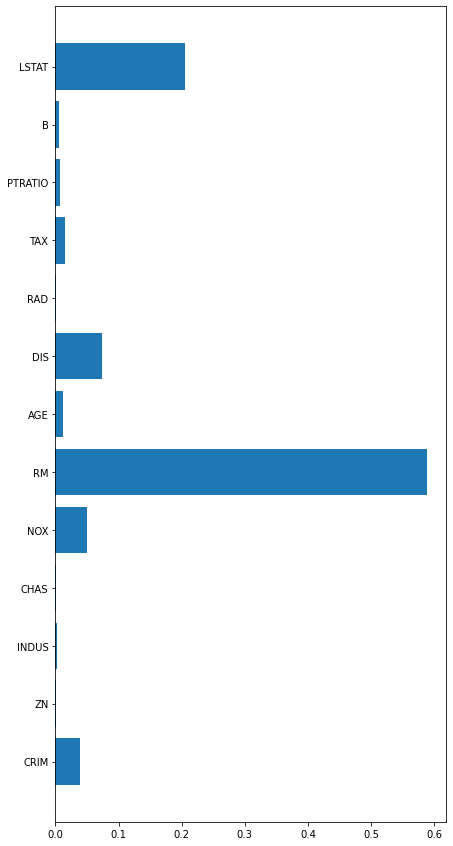

In [10]:
#Тестирую функцию на исходной выборке. Модель явно переобучилась.
columns = load_boston()['feature_names']
X = data[columns]
y = data['MEDV']

training(X, y)

In [11]:
#Теперь мне надо получить параметры модели, при которых ошибка будет минимальной и не будет переобучения.
criterion = ('mse', 'mae', 'friedman_mse', 'poisson')
the_data, the_columns = best_dataset()

X = the_data[the_columns]
y = the_data['MEDV']

for crit in criterion:
    for depth in range(1, 10):
        for split in range(2, 10):
            for leaf in range(1, 10):
                best_columns, error = training(X, y, columns=the_columns, criterion=crit, max_depth=depth, min_samples_split=split, min_samples_leaf=leaf, errors=False, viz=False)
                if error < 1.4:
                    print(f'criterion={crit}, max_depth={depth}, min_samples_split={split}, min_samples_leaf={leaf}')
                    print(best_columns)  
                    print(error)
                    print()

criterion=mse, max_depth=9, min_samples_split=2, min_samples_leaf=1
['RM', 'AGE', 'DIS', 'TAX', 'B', 'LSTAT', 'RM2', 'LSTAT2', 'PTRATIO2', 'NOX2', 'RAD2', 'TAX2', 'NOX_INDUS', 'CRIM_RM', 'CRIM_AGE', 'LSTAT_AGE', 'LSTAT_INDUS', 'LSTAT_NOX', 'LSTAT_DIS', 'LSTAT_RAD', 'LSTAT_PTRATIO', 'INDUS_TAX', 'ZN_PTRATIO', 'AGE_DIS', 'AGE_RAD', 'DIS_B', 'RAD_B', 'CRIM_B_LSTAT']
1.156800038795338

criterion=mse, max_depth=9, min_samples_split=3, min_samples_leaf=1
['RM', 'TAX', 'B', 'RM2', 'LSTAT2', 'INDUS2', 'NOX2', 'AGE2', 'TAX2', 'NOX_INDUS', 'CRIM_RM', 'CRIM_AGE', 'CHAS_LSTAT', 'LSTAT_NOX', 'LSTAT_DIS', 'LSTAT_RAD', 'LSTAT_PTRATIO', 'RM_INDUS', 'INDUS_TAX', 'ZN_PTRATIO', 'AGE_DIS', 'AGE_RAD', 'DIS_B', 'RAD_B', 'CRIM_B_LSTAT']
1.3544896939677509

criterion=mae, max_depth=9, min_samples_split=2, min_samples_leaf=1
['CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'B', 'LSTAT', 'RM2', 'LSTAT2', 'INDUS2', 'NOX2', 'AGE2', 'TAX2', 'INDUS3', 'NOX3', 'PTRATIO4', 'NOX_INDUS', 'B_LSTAT', 'CRIM_RM', 'CRIM_AGE', 'CR

learning error: 1.3407204048241228
generalization error: 1.1568000387953377
Error: 1.2855062162647566


(['NOX',
  'RM',
  'AGE',
  'DIS',
  'TAX',
  'B',
  'LSTAT',
  'RM2',
  'LSTAT2',
  'AGE2',
  'TAX2',
  'NOX_INDUS',
  'CRIM_RM',
  'CRIM_AGE',
  'CRIM_PTRATIO',
  'LSTAT_AGE',
  'LSTAT_INDUS',
  'LSTAT_NOX',
  'LSTAT_RM',
  'LSTAT_RAD',
  'LSTAT_PTRATIO',
  'RM_INDUS',
  'ZN_PTRATIO',
  'AGE_DIS',
  'AGE_RAD',
  'DIS_B',
  'RAD_B',
  'CRIM_B_LSTAT'],
 1.1568000387953377)

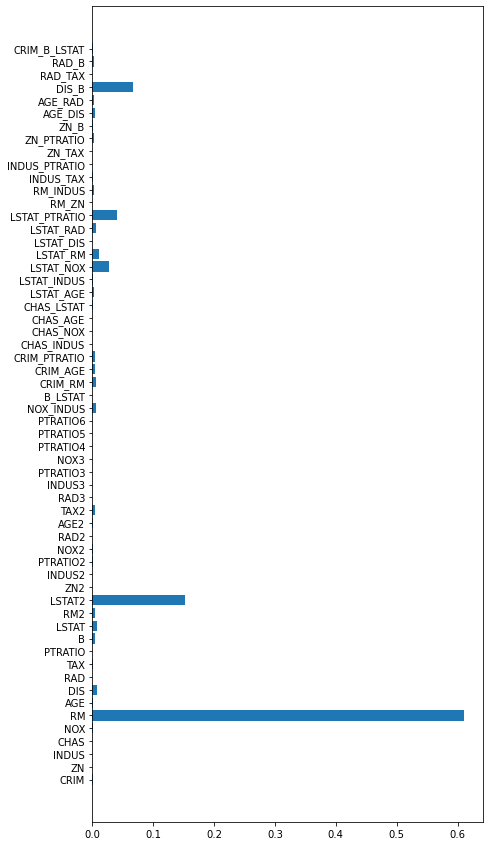

In [12]:
#Получается, что лучшие результаты дают значения по умолчанию и max_depth=9. Проверю, как работает такая модель
best_columns, error = training(X, y, columns=the_columns, criterion='mse', max_depth=9, min_samples_split=2, min_samples_leaf=1)
best_columns, error

Теперь попробую отобрать признаки, которые влияют на модель, и запустить алгоритм только на них.

In [13]:
reduced_columns = set()

for _ in range(50):
    best_columns, error = training(X, y, columns=the_columns, criterion='mse', max_depth=9, min_samples_split=3, min_samples_leaf=1, errors=False, viz=False)
    if error < 2:
        reduced_columns = reduced_columns.union(set(best_columns))
        
print(reduced_columns)

{'PTRATIO', 'LSTAT_DIS', 'NOX', 'TAX2', 'AGE2', 'INDUS_TAX', 'ZN2', 'ZN_PTRATIO', 'RM_ZN', 'INDUS', 'TAX', 'PTRATIO6', 'DIS', 'PTRATIO5', 'LSTAT_INDUS', 'AGE_DIS', 'AGE', 'LSTAT_PTRATIO', 'RM2', 'NOX_INDUS', 'LSTAT_NOX', 'LSTAT2', 'LSTAT_AGE', 'LSTAT_RM', 'LSTAT_RAD', 'CRIM_B_LSTAT', 'NOX3', 'INDUS3', 'RAD_B', 'ZN_B', 'DIS_B', 'B_LSTAT', 'RM', 'CRIM', 'PTRATIO2', 'PTRATIO3', 'B', 'RAD_TAX', 'INDUS_PTRATIO', 'CHAS_LSTAT', 'CRIM_PTRATIO', 'PTRATIO4', 'LSTAT', 'RM_INDUS', 'INDUS2', 'NOX2', 'CRIM_AGE', 'AGE_RAD', 'CRIM_RM'}


49
learning error: 1.7704689255341821
generalization error: 1.3544896939677515
Error: 1.6455890319997466


(['NOX',
  'TAX2',
  'ZN_PTRATIO',
  'RM_ZN',
  'DIS',
  'LSTAT_INDUS',
  'AGE_DIS',
  'AGE',
  'LSTAT_PTRATIO',
  'RM2',
  'NOX_INDUS',
  'LSTAT_NOX',
  'LSTAT2',
  'LSTAT_RAD',
  'CRIM_B_LSTAT',
  'RAD_B',
  'DIS_B',
  'RM',
  'CRIM',
  'B',
  'CHAS_LSTAT',
  'PTRATIO4',
  'LSTAT',
  'RM_INDUS',
  'CRIM_AGE',
  'AGE_RAD',
  'CRIM_RM'],
 1.3544896939677515)

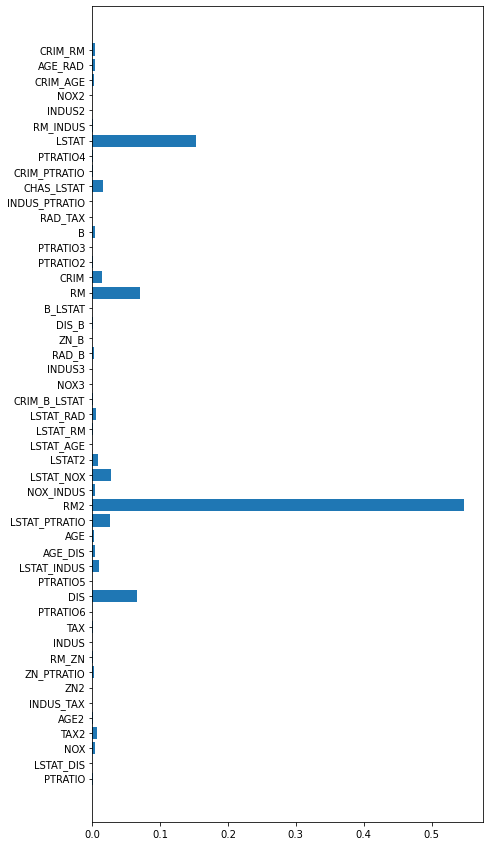

In [15]:
X = the_data[reduced_columns]
print(len(reduced_columns))
training(X, y, columns=reduced_columns, criterion='mse', max_depth=9, min_samples_split=3, min_samples_leaf=1)

In [17]:
#Повторю цикл для поиска оптимальных критериев для редуцированных признаков:
for crit in criterion:
    for depth in range(1, 10):
        for split in range(2, 10):
            for leaf in range(1, 10):
                best_columns, error = training(X, y, columns=reduced_columns, criterion=crit, max_depth=depth, min_samples_split=split, min_samples_leaf=leaf, errors=False, viz=False)
                if error < 1.4:
                    print(f'criterion={crit}, max_depth={depth}, min_samples_split={split}, min_samples_leaf={leaf}') 
                    print(error)
                    print()

criterion=mse, max_depth=9, min_samples_split=2, min_samples_leaf=1
1.1568000387953377

criterion=mse, max_depth=9, min_samples_split=3, min_samples_leaf=1
1.3544896939677504

criterion=mae, max_depth=9, min_samples_split=2, min_samples_leaf=1
1.2264482758620687

criterion=mae, max_depth=9, min_samples_split=3, min_samples_leaf=1
1.3097586206896552

criterion=friedman_mse, max_depth=9, min_samples_split=2, min_samples_leaf=1
1.1568000387953379

criterion=friedman_mse, max_depth=9, min_samples_split=3, min_samples_leaf=1
1.3544896939677518



Таким образом, при уменьшении количества признаков результаты работы цикла не изменились. 